In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hieut\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Starting reading the csv file and having an overview of the dataset

In [134]:
df = pd.read_csv('eng_french.csv')

In [4]:
df.head()

,English words/sentences,French words/sentences
0,Hi.,Salut!
1,Run!,Cours !
2,Run!,Courez !
3,Who?,Qui ?
4,Wow!,Ça alors !


In [137]:
df = df.rename(columns = {"English words/sentences":"English","French words/sentences":"French"})
df

,English,French
0,Hi.,Salut!
1,Run!,Cours !
2,Run!,Courez !
3,Who?,Qui ?
4,Wow!,Ça alors !
...,...,...
175616,"Top-down economics never works, said Obama. ""T...","« L'économie en partant du haut vers le bas, ç..."
175617,A carbon footprint is the amount of carbon dio...,Une empreinte carbone est la somme de pollutio...
175618,Death is something that we're often discourage...,La mort est une chose qu'on nous décourage sou...
175619,Since there are usually multiple websites on a...,Puisqu'il y a de multiples sites web sur chaqu...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175621 entries, 0 to 175620
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   English  175621 non-null  object
 1   French   175621 non-null  object
dtypes: object(2)
memory usage: 2.7+ MB


In [7]:
df.describe()

,English,French
count,175621,175621
unique,123100,165975
top,I can't tell you how happy I am that you've co...,Comment cela se peut-il ?
freq,32,9


In [8]:
df.shape

(175621, 2)

# Data Visualization before removing stopwords

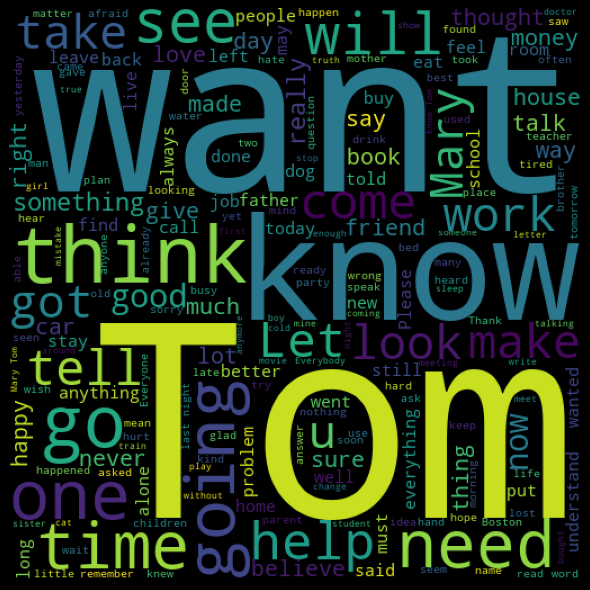

In [9]:
from wordcloud import WordCloud
English = ' '.join(df["English"])
English_wc = WordCloud(width = 512,height=512).generate(English)
plt.figure(figsize = (10,8) , facecolor = 'k')
plt.imshow(English_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

### A lot of familiar words such as know, want, dont, take, need, ...

# Data Visualization after removing stopwords

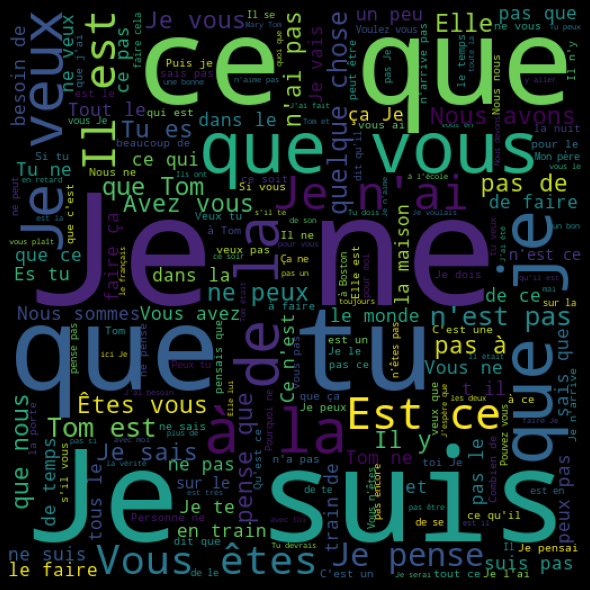

In [10]:
from wordcloud import WordCloud
French = ' '.join(df["French"])
French_wc = WordCloud(width = 512,height=512).generate(French)
plt.figure(figsize = (10,8) , facecolor = 'k')
plt.imshow(French_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

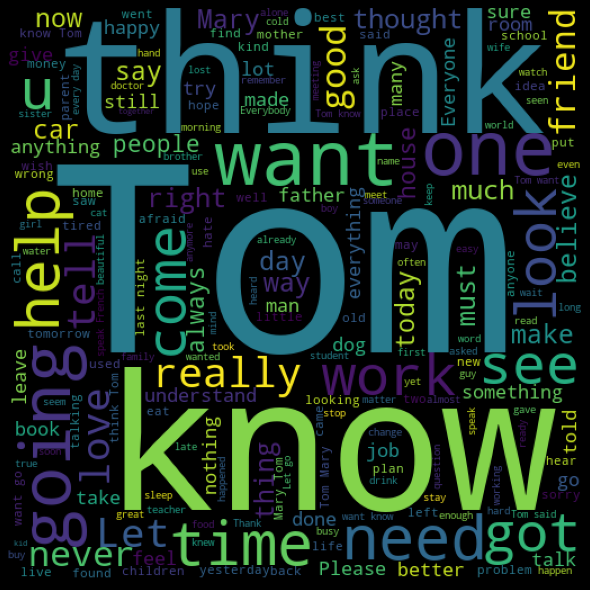

In [11]:
final_stopwords_list = stopwords.words('english') + stopwords.words('french')
df_stopwords = df.copy()
English = list()
for sentence in df_stopwords["English"]:
    for word in sentence.split():
        if word.lower() not in final_stopwords_list:
            English.append(word)
English = ' '.join(English)
English_wc = WordCloud(width = 512,height=512).generate(English)
plt.figure(figsize = (10,8) , facecolor = 'k')
plt.imshow(English_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

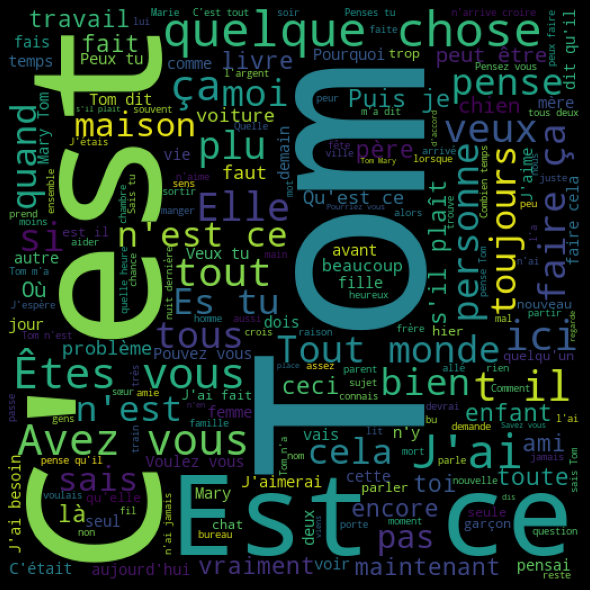

In [12]:
final_stopwords_list = stopwords.words('english') + stopwords.words('french')
df_stopwords = df.copy()
French = list()
for sentence in df_stopwords["French"]:
    for word in sentence.split():
        if word.lower() not in final_stopwords_list:
            French.append(word)
French = ' '.join(French)
French_wc = WordCloud(width = 512,height=512).generate(French)
plt.figure(figsize = (10,8) , facecolor = 'k')
plt.imshow(French_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

# Removing punctuation and regular expressions

In [13]:
df["English"] = df['English'].str.replace('[^\w\s]','')
df["French"] = df['French'].str.replace('[^\w\s]','')
df

,English,French
0,Hi,Salut
1,Run,Cours
2,Run,Courez
3,Who,Qui
4,Wow,Ça alors
...,...,...
175616,Topdown economics never works said Obama The c...,Léconomie en partant du haut vers le bas ça n...
175617,A carbon footprint is the amount of carbon dio...,Une empreinte carbone est la somme de pollutio...
175618,Death is something that were often discouraged...,La mort est une chose quon nous décourage souv...
175619,Since there are usually multiple websites on a...,Puisquil y a de multiples sites web sur chaque...


In [14]:
def having_number(language):
    for word in language:
        if word.isalpha():
            continue
        else:
            return False
    return True

Eng_check = having_number(df["English"])
French_check = having_number(df["French"])
print(Eng_check)
print(French_check)

False
False


### Although we have numbers in our dataset, we have to keep it because it is very important for the machine translation task

# Creating dictionaries for English and French

In [15]:
import collections

In [97]:
english_words_counter = collections.Counter([word for sentence in df["English"] for word in sentence.split()])
french_words_counter = collections.Counter([word for sentence in df["French"] for word in sentence.split()])

In [98]:
English_df = pd.DataFrame.from_dict(english_words_counter,orient='index').reset_index()
English_df = English_df.rename(columns={'index':'Word', 0:'Frequency'})
English_df

,Word,Frequency
0,Hi,9
1,Run,14
2,Who,893
3,Wow,12
4,Fire,5
...,...,...
16409,empowering,1
16410,clarifies,1
16411,click,1
16412,webpage,1


# Top 10 most frequency tokens in English and French

In [99]:
English_df.sort_values(by=['Frequency'], inplace=True)
English_df.reset_index(drop=True, inplace=True)
English_df[-10:]

,Word,Frequency
16404,me,10676
16405,of,11806
16406,that,12515
16407,Tom,14559
16408,is,15861
16409,a,24319
16410,the,28621
16411,you,38580
16412,to,39059
16413,I,48481


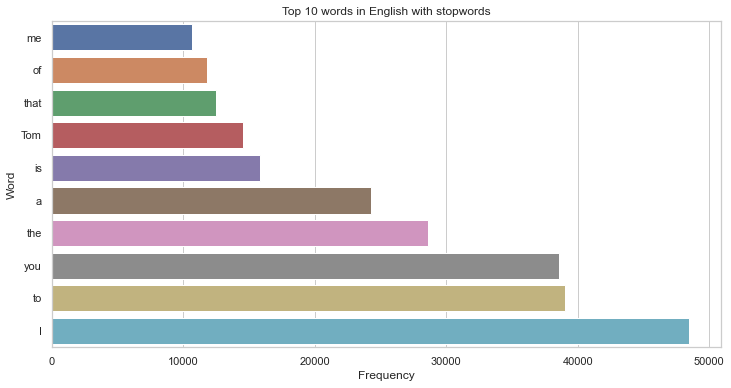

In [100]:
sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Frequency', y='Word', data=English_df[-10:]).set_title("Top 10 words in English with stopwords")

In [101]:
French_df = pd.DataFrame.from_dict(french_words_counter,orient='index').reset_index()
French_df = French_df.rename(columns={'index':'Word', 0:'Frequency'})
French_df

,Word,Frequency
0,Salut,16
1,Cours,3
2,Courez,2
3,Qui,958
4,Ça,1542
...,...,...
31482,investit,1
31483,clique,1
31484,jatterris,1
31485,surgissantes,1


In [102]:
French_df.sort_values(by=['Frequency'], inplace=True)
French_df.reset_index(drop=True, inplace=True)
French_df[-10:]

,Word,Frequency
31477,Il,13980
31478,Tom,15144
31479,le,17168
31480,la,18035
31481,ne,18979
31482,à,21071
31483,que,24770
31484,pas,28669
31485,Je,34981
31486,de,36253


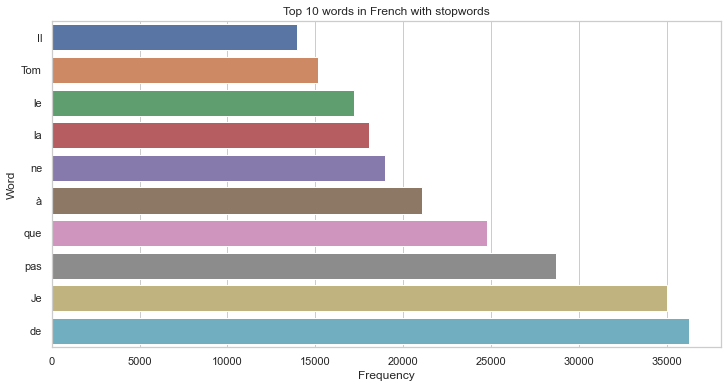

In [104]:
sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Frequency', y='Word', data=French_df[-10:]).set_title("Top 10 words in French with stopwords")

In [23]:
print('{} English words.'.format(len([word for sentence in df["English"] for word in sentence.split()])))
print('{} unique English words.'.format(len(english_words_counter)))
print('10 Most common words in the English dataset:')
print('"' + '" "'.join(list(zip(*english_words_counter.most_common(10)))[0]) + '"')
print()
print('{} French words.'.format(len([word for sentence in df["French"] for word in sentence.split()])))
print('{} unique French words.'.format(len(french_words_counter)))
print('10 Most common words in the French dataset:')
print('"' + '" "'.join(list(zip(*french_words_counter.most_common(10)))[0]) + '"')

1082094 English words.
16414 unique English words.
10 Most common words in the English dataset:
"I" "to" "you" "the" "a" "is" "Tom" "that" "of" "me"

1142744 French words.
31487 unique French words.
10 Most common words in the French dataset:
"de" "Je" "pas" "que" "à" "ne" "la" "le" "Tom" "Il"


# Removing stop words and plot it again

In [105]:
for index, row in English_df.iterrows():
    if row['Word'] in final_stopwords_list:
        English_df.drop(index, inplace=True)
English_df.reset_index(drop=True, inplace=True)

for index, row in French_df.iterrows():
    if row['Word'] in final_stopwords_list:
        French_df.drop(index, inplace=True)
French_df.reset_index(drop=True, inplace=True)

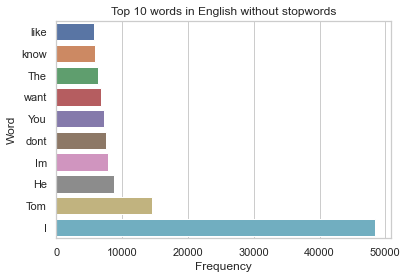

In [109]:
ax2 = sns.barplot(x='Frequency', y='Word', data=English_df[-10:]).set_title("Top 10 words in English without stopwords")

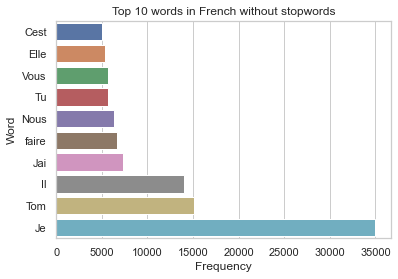

In [110]:
ax2 = sns.barplot(x='Frequency', y='Word', data=French_df[-10:]).set_title("Top 10 words in French without stopwords")

# Showing the uniqueness between English and French

([<matplotlib.axis.XTick at 0x13f1d050b80>,
 [Text(0, 0, 'English'), Text(0, 0, 'French')])

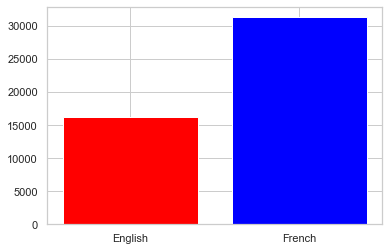

In [27]:
length = [len(English_df['Word']),len(French_df['Word'])]
key = ["English","French"]
y_pos = np.arange(len(key))
plt.bar(y_pos, length, color=['red','blue'])
plt.xticks(y_pos, key)

### We can see that French vocabs double English

# Counting the distribution of the POS tags

In [28]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [29]:
POS_Eng = dict()
for sentence in df["English"]:
    about_doc = nlp(sentence)
    for token in about_doc:
        if token.pos_ not in POS_Eng:
            POS_Eng[token.pos_] = 1
        else:
            POS_Eng[token.pos_] += 1

In [127]:
POS_Eng

{'INTJ': 3666,
 'VERB': 226279,
 'PRON': 199453,
 'NOUN': 150781,
 'ADP': 74339,
 'AUX': 105159,
 'ADV': 68039,
 'NUM': 5722,
 'DET': 127642,
 'PROPN': 27746,
 'ADJ': 61585,
 'PART': 60647,
 'SCONJ': 15845,
 'SPACE': 21,
 'X': 32,
 'CCONJ': 5980,
 'PUNCT': 14,
 'SYM': 13}

# Tryout Usual Barplot

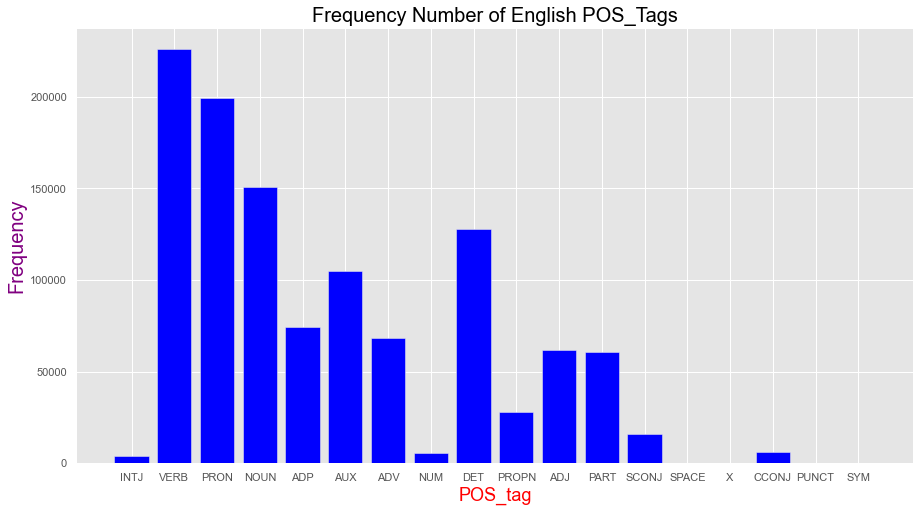

In [115]:
# length = [len(English_df['Word']),len(French_df['Word'])]
# key = ["English","French"]
# y_pos = np.arange(len(key))
# plt.bar(y_pos, length, color=['red','blue'])
# plt.xticks(y_pos, key)

plt.style.use('ggplot')

x = [key for key in POS_Eng]
energy = [value for value in POS_Eng.values()]

x_pos = [i for i, _ in enumerate(x)]
plt.figure(figsize=(15, 8))
plt.bar(x_pos, energy, color='blue')
plt.xlabel('POS_tag',color='red',fontsize=18)
plt.ylabel('Frequency',color='purple',fontsize=20)
plt.title('Frequency Number of English POS_Tags',color='Black',fontsize=20)
plt.xticks(x_pos, x)

plt.show()

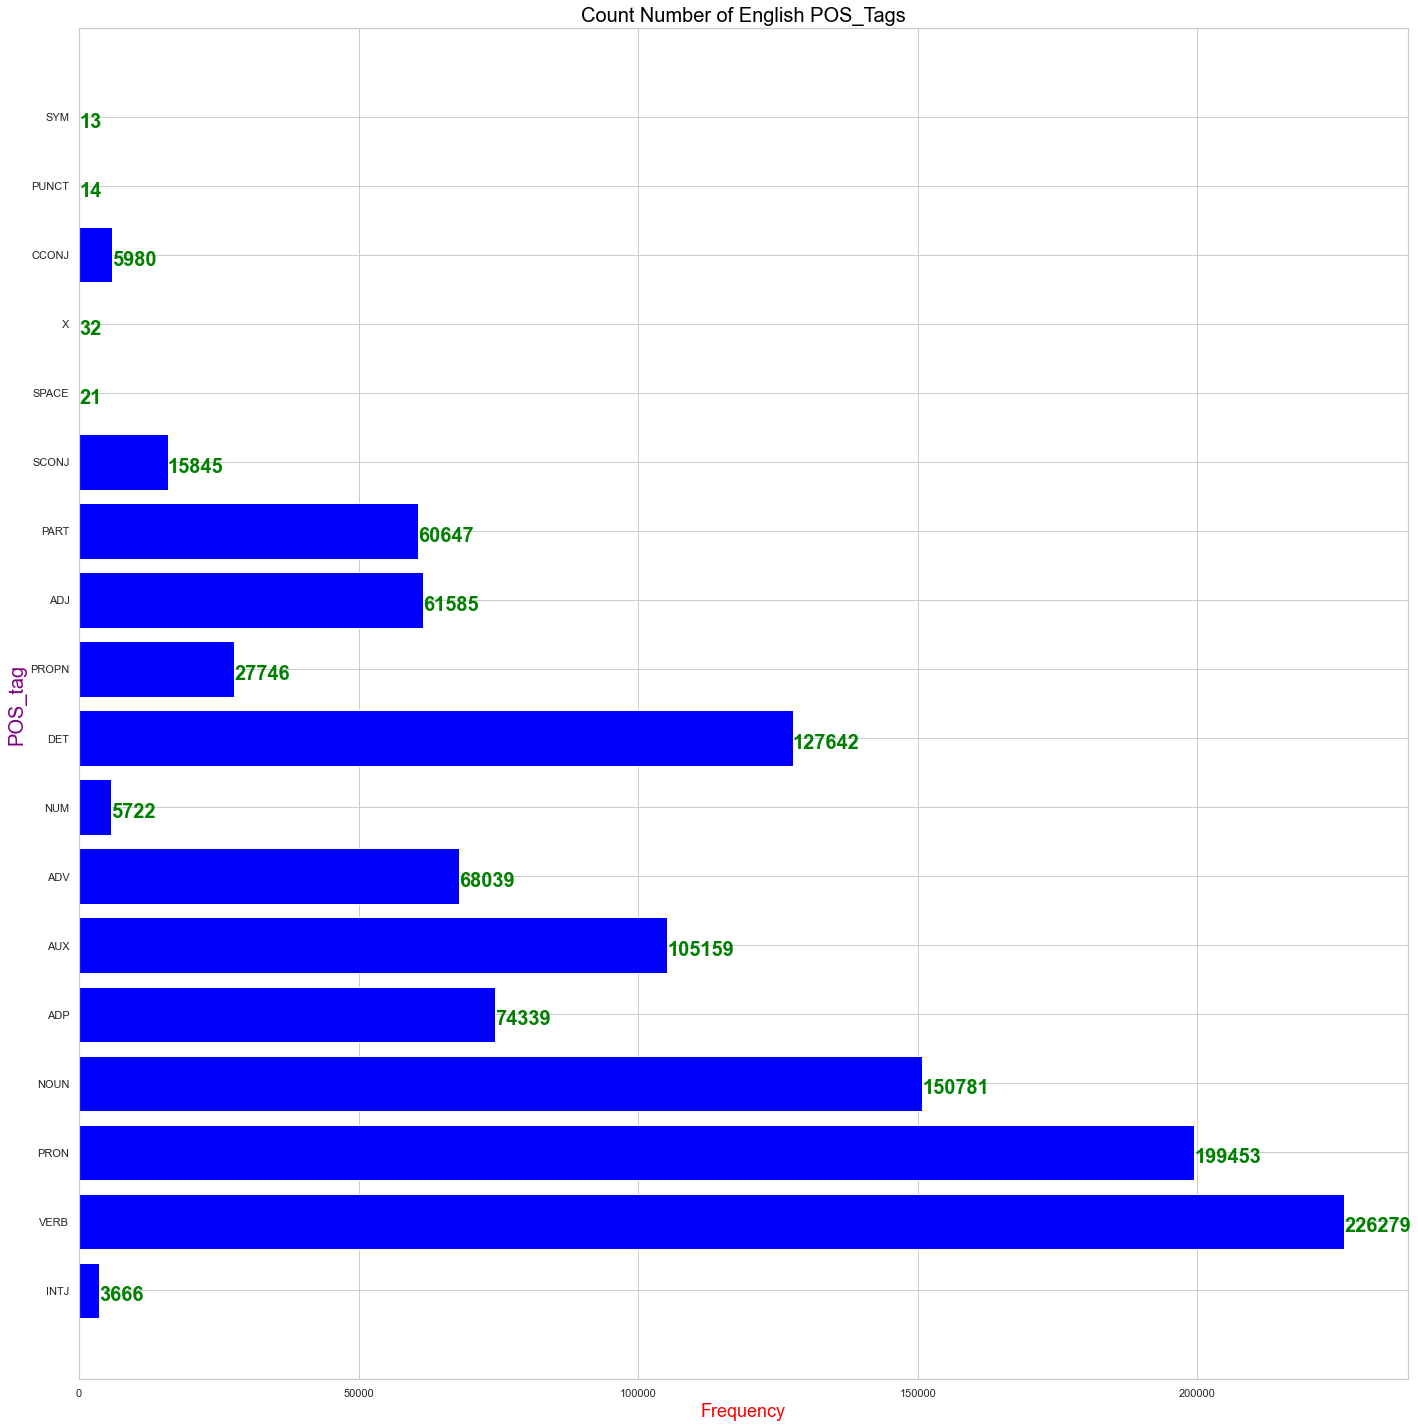

In [61]:
keys = [key for key in POS_Eng]
values = [value for value in POS_Eng.values()]

plt.figure(figsize=(20,20))
# Make fake dataset
height = values
bars = keys
y_pos = np.arange(len(keys))

 
# Create horizontal bars
plt.barh(y_pos,height,color="blue")
 
# Create names on the y-axis
plt.yticks(y_pos, bars)
# plt.set_yticks(y_pos+0.75/2)
 
plt.xlabel('Frequency',color='red',fontsize=18)
plt.ylabel('POS_tag',color='purple',fontsize=20)
plt.title('Count Number of English POS_Tags',color='Black',fontsize=20)

for i, v in enumerate(height):
    plt.text(v + 3, i-0.15, str(v), color='green', fontweight='bold', fontsize=20)

plt.tight_layout()

### As expected, VERB, NOUN, PRON, and DET POS tag occur a lot in the sentences

In [77]:
import spacy
nlp = spacy.load("fr_core_news_sm")
POS_French = dict()
for sentence in df["French"]:
    about_doc = nlp(sentence)
    for token in about_doc:
        if token.pos_ not in POS_French:
            POS_French[token.pos_] = 1
        else:
            POS_French[token.pos_] += 1

In [78]:
POS_French

{'NOUN': 207823,
 'SPACE': 12459,
 'PRON': 167415,
 'CCONJ': 13216,
 'ADV': 117092,
 'DET': 130055,
 'ADP': 100688,
 'SCONJ': 28105,
 'VERB': 208421,
 'PROPN': 27328,
 'AUX': 64720,
 'ADJ': 68588,
 'NUM': 6546,
 'PUNCT': 284,
 'INTJ': 618,
 'X': 1822,
 'SYM': 22,
 'PART': 1}

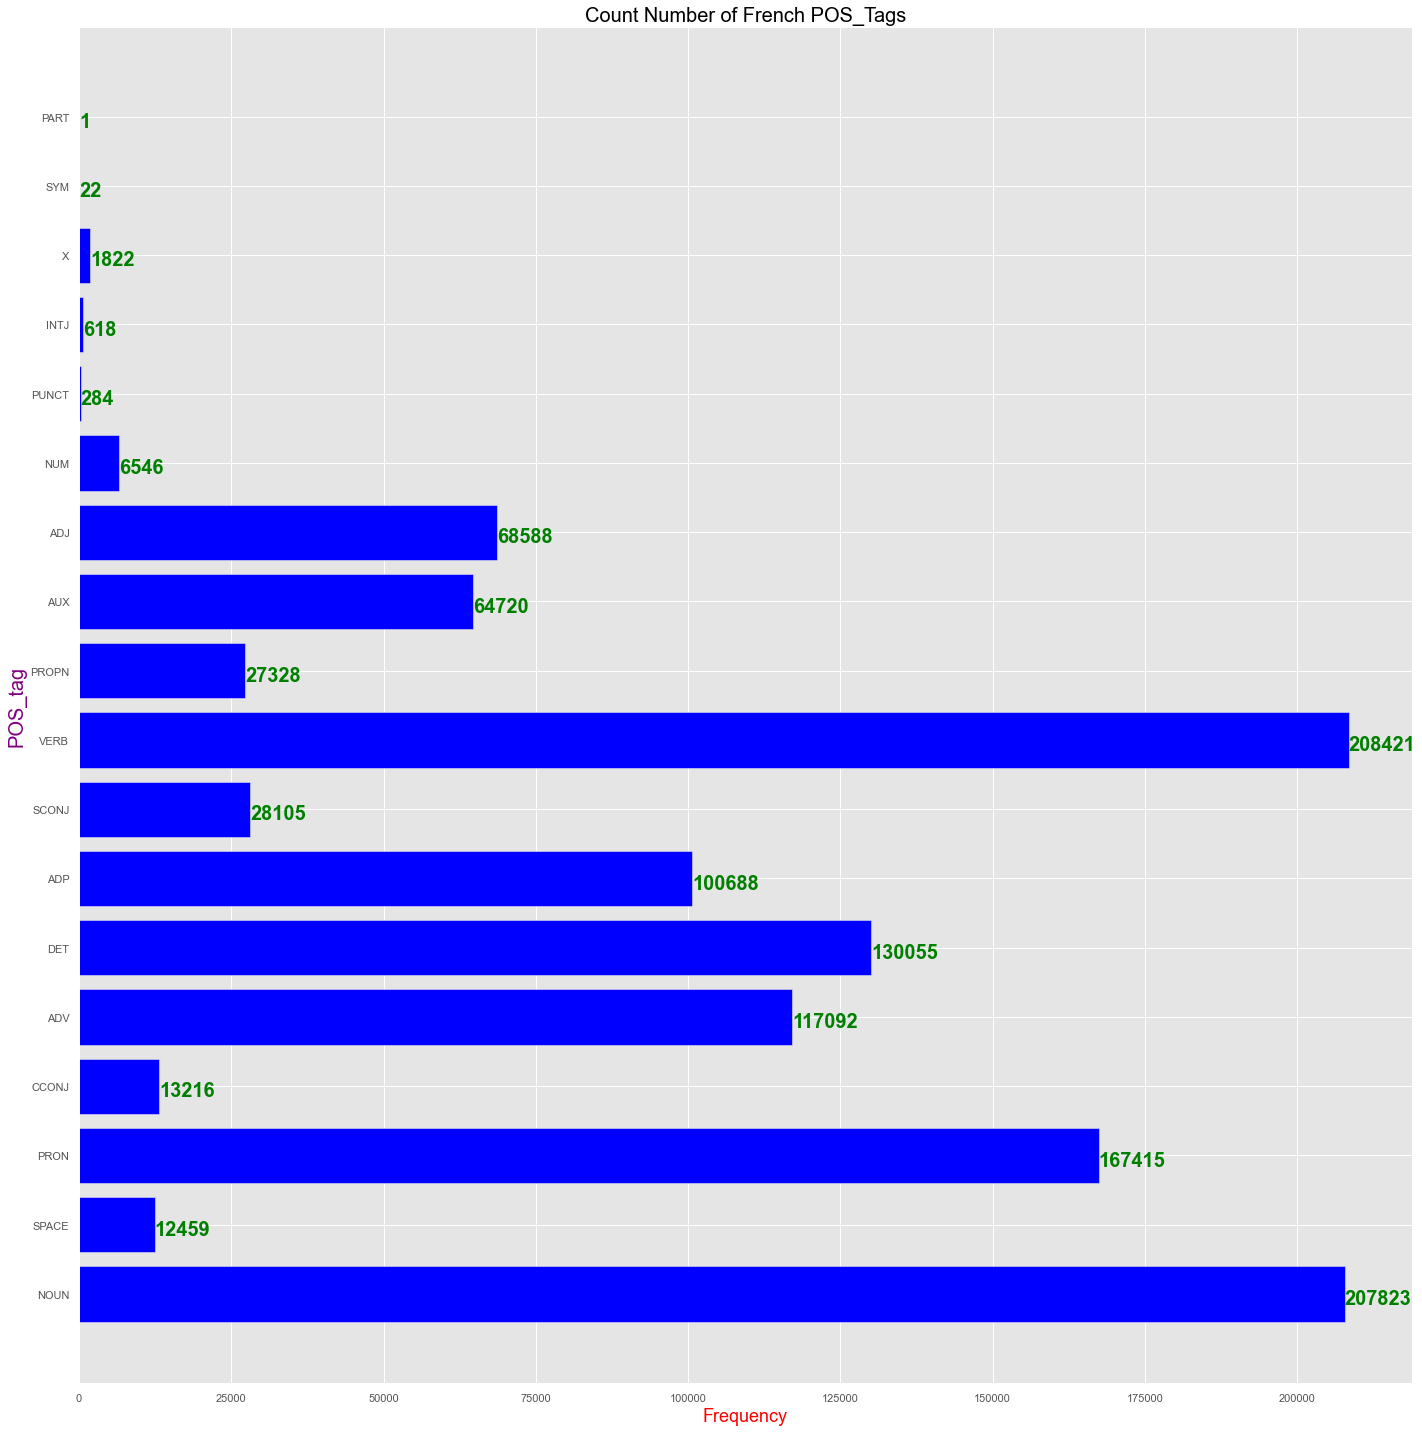

In [128]:
keys = [key for key in POS_French]
values = [value for value in POS_French.values()]

plt.figure(figsize=(20,20))
# Make fake dataset
height = values
bars = keys
y_pos = np.arange(len(keys))

 
# Create horizontal bars
plt.barh(y_pos,height,color="blue")
 
# Create names on the y-axis
plt.yticks(y_pos, bars)
# plt.set_yticks(y_pos+0.75/2)
 
plt.xlabel('Frequency',color='red',fontsize=18)
plt.ylabel('POS_tag',color='purple',fontsize=20)
plt.title('Count Number of French POS_Tags',color='Black',fontsize=20)

for i, v in enumerate(height):
    plt.text(v + 3, i-0.15, str(v), color='green', fontweight='bold', fontsize=20)

plt.tight_layout()

# Tryout regular bar plot for better visualization

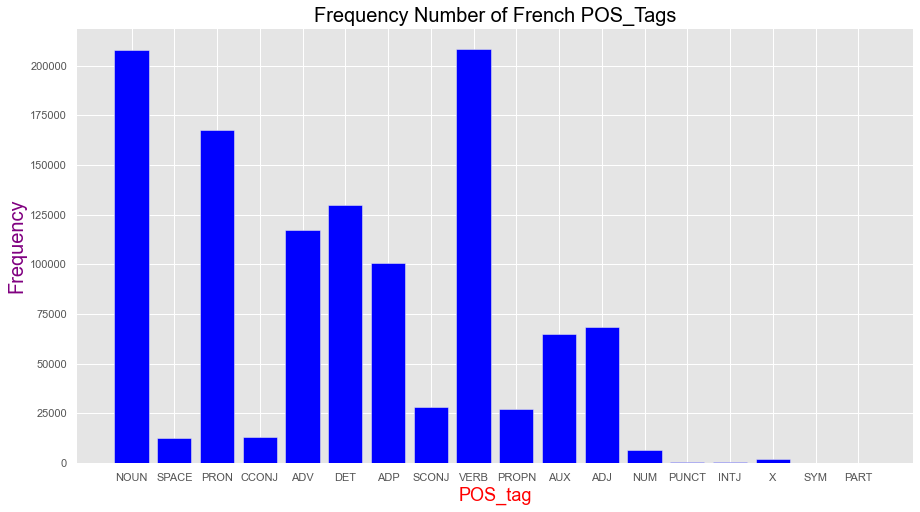

In [114]:
plt.style.use('ggplot')

x = [key for key in POS_French]
energy = [value for value in POS_French.values()]

x_pos = [i for i, _ in enumerate(x)]
plt.figure(figsize=(15, 8))
plt.bar(x_pos, energy, color='blue')
plt.xlabel('POS_tag',color='red',fontsize=18)
plt.ylabel('Frequency',color='purple',fontsize=20)
plt.title('Frequency Number of French POS_Tags',color='Black',fontsize=20)
plt.xticks(x_pos, x)

plt.show()

# Counting words for each row and plot in to see different range

In [81]:
# max, min of sentences
# word_counts for each row
English_word_count = list()
for sentence in df["English"]:
    sent = sentence.split()
    English_word_count.append(len(sent))
French_word_count = list()
for sentence in df["French"]:
    sent = sentence.split()
    French_word_count.append(len(sent))
print(f"The longest English sentence has : {max(English_word_count)} words ")
print(f"The longest French sentence has : {max(French_word_count)} words ")
print()
print(f"The shortest English sentence has : {min(English_word_count)} words ")
print(f"The shortest French sentence has : {min(French_word_count)} words ")

The longest English sentence has : 44 words 
The longest French sentence has : 55 words 

The shortest English sentence has : 1 words 
The shortest French sentence has : 1 words 


In [82]:
word_count_df = pd.DataFrame(list(zip(English_word_count, French_word_count)), 
               columns =['English_wordcount', 'French_wordcount']) 

In [83]:
word_count_df

,English_wordcount,French_wordcount
0,1,1
1,1,1
2,1,1
3,1,1
4,1,2
...,...,...
175616,34,43
175617,34,33
175618,37,47
175619,43,49


In [84]:
difference = list()
for count in range(0,len(English_word_count)):
    diff = French_word_count[count] - English_word_count[count]
    difference.append(diff)
word_count_df["Difference"] = difference
print(f"The biggest difference between English and French sentence is : {max(difference)} words")

The biggest difference between English and French sentence is : 11 words


In [85]:
word_count_df.iloc[0:175620:10000,:]

,English_wordcount,French_wordcount,Difference
0,1,1,0
10000,3,3,0
20000,4,5,1
30000,3,3,0
40000,4,2,-2
50000,5,3,-2
60000,6,5,-1
70000,5,7,2
80000,6,5,-1
90000,6,6,0


In [86]:
engl_range = {"1-10 words":0,
              "11-20 words":0,
              "21-30 words":0,
              "31-44 words":0,
             "45-55 words":0}
french_range = {"1-10 words":0,
              "11-20 words":0,
              "21-30 words":0,
              "31-44 words":0,
               "45-55 words":0}

In [87]:
for count in English_word_count:
    if 1 <= count <= 10:
        engl_range["1-10 words"] +=1
    elif 11 <= count <= 20:
        engl_range["11-20 words"] +=1
    elif 21 <= count <= 30:
        engl_range["21-30 words"] +=1
    elif 31 <= count <= 44:
        engl_range["31-44 words"] +=1

for count in French_word_count:
    if 1 <= count <= 10:
        french_range["1-10 words"] +=1
    elif 11 <= count <= 20:
        french_range["11-20 words"] +=1
    elif 21 <= count <= 30:
        french_range["21-30 words"] +=1
    elif 31 <= count <= 44:
        french_range["31-44 words"] +=1
    else:
        french_range["45-55 words"] += 1

In [88]:
engl_range

{'1-10 words': 165961,
 '11-20 words': 9526,
 '21-30 words': 122,
 '31-44 words': 12,
 '45-55 words': 0}

In [89]:
french_range

{'1-10 words': 161143,
 '11-20 words': 14213,
 '21-30 words': 250,
 '31-44 words': 12,
 '45-55 words': 3}

In [90]:
df1 = pd.DataFrame.from_dict(engl_range, orient='index').reset_index()
df1 = df1.rename(columns={'index':'range', 0:'count'})
df1

,range,count
0,1-10 words,165961
1,11-20 words,9526
2,21-30 words,122
3,31-44 words,12
4,45-55 words,0


In [91]:
df2 = pd.DataFrame.from_dict(french_range, orient='index').reset_index()
df2 = df2.rename(columns={'index':'range', 0:'count'})
df2

,range,count
0,1-10 words,161143
1,11-20 words,14213
2,21-30 words,250
3,31-44 words,12
4,45-55 words,3


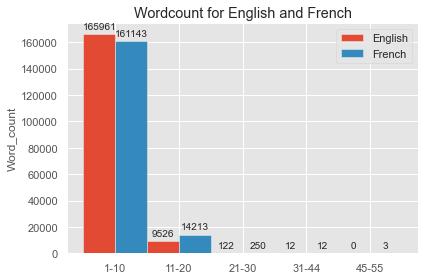

<Figure size 1152x720 with 0 Axes>

In [152]:
labels = ["1-10","11-20","21-30","31-44","45-55"]
English = list(df1["count"])
French = list(df2["count"])

x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, English, width, label='English')
rects2 = ax.bar(x + width/2, French, width, label='French')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Word_count')
ax.set_title('Wordcount for English and French')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

plt.figure(figsize=(16, 10))

fig.tight_layout()

plt.show()

# Punctuations count for English and French

In [145]:
Engl_punct_dict = {".":0,
             ",":0,
             "!":0,
             "?":0}

In [146]:
for sentence in df["English"]:
    for i in range(len(sentence)):
        if sentence[i] in punct_dict:
            Engl_punct_dict[sentence[i]] +=1
Engl_punct_dict

{'.': 147033, ',': 9840, '!': 1294, '?': 29064}

In [147]:
French_punct_dict = {".":0,
             ",":0,
             "!":0,
             "?":0}
for sentence in df["French"]:
    for i in range(len(sentence)):
        if sentence[i] in punct_dict:
            French_punct_dict[sentence[i]] +=1
French_punct_dict

{'.': 142592, ',': 13488, '!': 5576, '?': 29083}

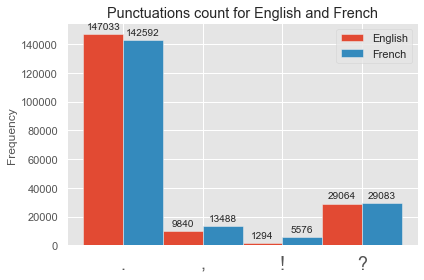

<Figure size 1152x720 with 0 Axes>

In [151]:
labels = [key for key in French_punct_dict]
English = [values for values in Engl_punct_dict.values()]
French = [values for values in French_punct_dict.values()]

x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, English, width, label='English')
rects2 = ax.bar(x + width/2, French, width, label='French')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency')
ax.set_title('Punctuations count for English and French')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=18)
ax.legend()

autolabel(rects1)
autolabel(rects2)

plt.figure(figsize=(16, 10))

fig.tight_layout()

plt.show()